In [1]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as ks
# Path to CIFAR-10 Python dataset
dataset_path = "/kaggle/input/cifar10-python/cifar-10-batches-py"

# Function to unpickle a batch file
def unpickle(file):
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

# Load all training batches
all_images = []
all_labels = []

for i in range(1, 6):  # data_batch_1 to data_batch_5
    batch = unpickle(os.path.join(dataset_path, f'data_batch_{i}'))
    images = batch[b'data']
    labels = batch[b'labels']
    
    # Reshape and transpose images to (num_images, 32, 32, 3)
    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    
    all_images.append(images)
    all_labels.extend(labels)

# Combine all batches into single arrays
all_images = np.concatenate(all_images, axis=0)
all_labels = np.array(all_labels)

# Normalize pixel values to [0,1]
all_images = all_images.astype('float32') / 255.0

print("Images shape:", all_images.shape)
print("Labels shape:", all_labels.shape)

plt.figure(figsize=(10,2))
for i in range(100):
    plt.subplot(1, 100, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()


2025-09-29 08:11:31.244606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759133491.520442      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759133491.600168      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Images shape: (50000, 32, 32, 3)
Labels shape: (50000,)


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-29 08:11:55.744909: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoding
labels_cat = to_categorical(all_labels, num_classes=10)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, labels_cat, test_size=0.2, random_state=42)

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.3238 - loss: 1.8187 - val_accuracy: 0.5188 - val_loss: 1.3327
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5344 - loss: 1.3015 - val_accuracy: 0.5832 - val_loss: 1.1749
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5956 - loss: 1.1351 - val_accuracy: 0.6156 - val_loss: 1.0694
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6413 - loss: 1.0215 - val_accuracy: 0.6473 - val_loss: 1.0029
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6751 - loss: 0.9311 - val_accuracy: 0.6463 - val_loss: 0.9905
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6955 - loss: 0.8670 - val_accuracy: 0.6679 - val_loss: 0.9533
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7164 - loss: 0.8070 - val_accuracy: 0.6921 - val_loss: 0.8876
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7415 - loss: 0.7306 - 

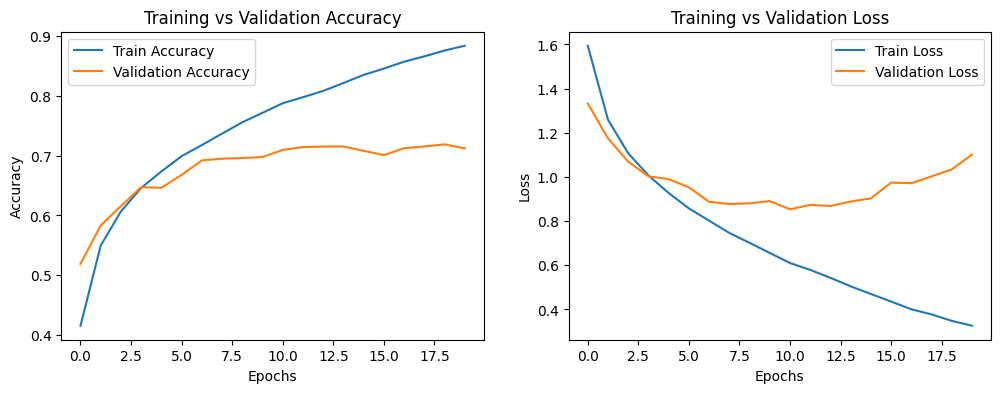

In [5]:
# --- Plot training history ---
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()